# KHÁM PHÁ DỮ LIỆU

Dữ liệu chứa trong file `tips.csv` chứa thông tin tiền tip của khách hàng tại một nhà hàng. Dữ liệu có các thông tin sau:

- `total_bill`: tổng hoá đơn (USD)
- `tip`: tiền tip/ tiền boa (USD)
- `sex`: giới tính người thanh toán hóa đơn
- `smoker`: có hút thuốc hay không
- `day`: ngày trong tuần
- `time`: thời gian dùng bữa(buổi sáng, buổi trưa, buổi tối)
- `size`: số lượng người tham gia

Bạn hãy thực hiện thống kê mô tả để tìm hiểu về hành vi tip của khách hàng tại nhà hàng

In [13]:
path= "/content/drive/MyDrive/data/tips.csv"
df = pd.read_csv(path)
# Hiển thị thông tin tổng quan về dữ liệu

# Thống kê mô tả
description = df.describe() # Changed 'tips' to 'df'
print(description)

# Thống kê theo giới tính
sex_stats = df.groupby('sex').describe() # Changed 'tips' to 'df'
print(sex_stats)

# Thống kê theo ngày trong tuần
day_stats = df.groupby('day').describe() # Changed 'tips' to 'df'
print(day_stats)

# Thống kê theo thời gian
time_stats = df.groupby('time').describe() # Changed 'tips' to 'df'
print(time_stats)

# Thống kê theo số lượng người tham gia
size_stats = df.groupby('size').describe() # Changed 'tip' to 'df'
print(size_stats)

# Tính tỷ lệ phần trăm tip so với tổng hoá đơn
df['tip_percentage'] = (df['tip'] / df['total_bill']) * 100 # Changed 'data' to 'df'
print(df[['total_bill', 'tip', 'tip_percentage']].head()) # Changed 'data' to 'df'

       Unnamed: 0  total_bill         tip        size
count  244.000000  244.000000  244.000000  244.000000
mean   121.500000   19.785943    2.998279    2.569672
std     70.580923    8.902412    1.383638    0.951100
min      0.000000    3.070000    1.000000    1.000000
25%     60.750000   13.347500    2.000000    2.000000
50%    121.500000   17.795000    2.900000    2.000000
75%    182.250000   24.127500    3.562500    3.000000
max    243.000000   50.810000   10.000000    6.000000
       Unnamed: 0                                                         \
            count        mean        std  min   25%    50%    75%    max   
sex                                                                        
Female       87.0  128.080460  65.468121  0.0  83.5  131.0  182.0  243.0   
Male        157.0  117.853503  73.208853  1.0  53.0  110.0  182.0  242.0   

       total_bill             ...   tip         size                           \
            count       mean  ...   75%   max  count

In [5]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## HIỂU DỮ LIỆU

1. Đọc dữ liệu
2. Xoá cột `Unnamed: 0`
3. Cho biết dữ liệu có bao nhiêu dòng, bao nhiêu thuộc tính.
4. Trong các thuộc tính, thuộc tính nào là thuộc tính phân loại, thuộc tính nào là thuộc tính định lượng
5. Có bao nhiêu nam, bao nhiêu nữ. Tỷ lệ bao nhiêu?
6. Có bao nhiêu người hút thuốc. Tỷ lệ bao nhiêu?
7. Ngày nào trong tuần khách hàng hay đến dùng bữa nhất. Tỷ lệ bao nhiêu?
8. Nhà hàng phục vụ bữa ăn nào nhiều nhất (Breakfast, Lunch, Dinner)?
9. Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là bao nhiêu người?
10. Trung bình trong một bữa ăn nhà hàng phục vụ mấy khách?

In [18]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

path= "/content/drive/MyDrive/data/tips.csv"
df = pd.read_csv(path)
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Thông tin về số dòng và số thuộc tính
# Changed 'data' to 'df' here
num_rows, num_columns = df.shape
print(f"Số dòng: {num_rows}, Số thuộc tính: {num_columns}")

# Phân loại thuộc tính
# Changed 'data' to 'df' here
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
# Changed 'data' to 'df' here
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(f"Thuộc tính phân loại: {categorical_columns}")
print(f"Thuộc tính định lượng: {numerical_columns}")

# Số lượng nam, nữ và tỷ lệ
# Changed 'data' to 'df' here
gender_counts = df['sex'].value_counts()
num_men = gender_counts.get('Male', 0)
num_women = gender_counts.get('Female', 0)
total_gender = num_men + num_women
male_ratio = num_men / total_gender * 100 if total_gender > 0 else 0
female_ratio = num_women / total_gender * 100 if total_gender > 0 else 0

print(f"Số nam: {num_men}, Số nữ: {num_women}, Tỷ lệ nam: {male_ratio:.2f}%, Tỷ lệ nữ: {female_ratio:.2f}%")

# Số lượng người hút thuốc và tỷ lệ
# Changed 'data' to 'df' here
smoker_counts = df['smoker'].value_counts()
num_smokers = smoker_counts.get('Yes', 0)
total_customers = num_rows
smoker_ratio = num_smokers / total_customers * 100 if total_customers > 0 else 0

print(f"Số người hút thuốc: {num_smokers}, Tỷ lệ: {smoker_ratio:.2f}%")

# Ngày nào khách hàng hay đến dùng bữa nhất
# Changed 'data' to 'df' here
most_common_day = df['day'].mode()[0]
# Changed 'data' to 'df' here
most_common_day_count = df['day'].value_counts().max()
most_common_day_ratio = most_common_day_count / total_customers * 100 if total_customers > 0 else 0

print(f"Ngày khách hàng hay đến nhất: {most_common_day}, Tỷ lệ: {most_common_day_ratio:.2f}%")

# Bữa ăn nào phục vụ nhiều nhất
# Changed 'data' to 'df' here
most_common_time = df['time'].mode()[0]
# Changed 'data' to 'df' here
most_common_time_count = df['time'].value_counts().max()

print(f"Bữa ăn phục vụ nhiều nhất: {most_common_time}")

# Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất
# Changed 'data' to 'df' here
most_common_size = df['size'].mode()[0]
# Changed 'data' to 'df' here
most_common_size_count = df['size'].value_counts().max()

print(f"Nhóm khách hàng dùng bữa nhiều nhất là: {most_common_size} người")

# Trung bình trong một bữa ăn phục vụ mấy khách
# Changed 'data' to 'df' here
average_size = df['size'].mean()
print

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Số dòng: 244, Số thuộc tính: 7
Thuộc tính phân loại: ['sex', 'smoker', 'day', 'time']
Thuộc tính định lượng: ['total_bill', 'tip', 'size']
Số nam: 157, Số nữ: 87, Tỷ lệ nam: 64.34%, Tỷ lệ nữ: 35.66%
Số người hút thuốc: 93, Tỷ lệ: 38.11%
Ngày khách hàng hay đến nhất: Sat, Tỷ lệ: 35.66%
Bữa ăn phục vụ nhiều nhất: Dinner
Nhóm khách hàng dùng bữa nhiều nhất là: 2 người


<function print>

In [14]:
import pandas as pd

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## YẾU TỐ ẢNH HƯỞNG ĐẾN TIỀN TIP

Trong phần này, chúng ta thử tìm hiểu về tiền tip tại nhà hàng và các yếu tố có thể ảnh hưởng đến nó

1. Tỷ lệ nhận được tiền tip của nhà hàng là bao nhiêu?
2. Tỷ lệ tiền tip trên tổng hóa đơn là bao nhiêu?
3. Giữa nam và nữ ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
4. Giữa người hút thuốc và người không hút thuốc ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
5. Thống kê tổng số tiền tip nhận được theo ngày.

In [19]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/data/tips.csv"
df = pd.read_csv(path)
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# 1. Tỷ lệ nhận được tiền tip của nhà hàng là bao nhiêu?
tip_ratio = len(df[df['tip'] > 0]) / len(df) * 100
print(f"Tỷ lệ nhận được tiền tip: {tip_ratio:.2f}%")

# 2. Tỷ lệ tiền tip trên tổng hóa đơn là bao nhiêu?
average_tip_percentage = (df['tip'] / df['total_bill']).mean() * 100
print(f"Tỷ lệ tiền tip trên tổng hóa đơn: {average_tip_percentage:.2f}%")

# 3. Giữa nam và nữ ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
tip_by_gender = df.groupby('sex')['tip'].agg(['mean', 'count'])
print("\nThống kê tiền tip theo giới tính:")
print(tip_by_gender)

# 4. Giữa người hút thuốc và người không hút thuốc ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
tip_by_smoker = df.groupby('smoker')['tip'].agg(['mean', 'count'])
print("\nThống kê tiền tip theo người hút thuốc:")
print(tip_by_smoker)

# 5. Thống kê tổng số tiền tip nhận được theo ngày
tip_by_day = df.groupby('day')['tip'].sum()
print("\nTổng số tiền tip nhận được theo ngày:")
print(tip_by_day)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Tỷ lệ nhận được tiền tip: 100.00%
Tỷ lệ tiền tip trên tổng hóa đơn: 16.08%

Thống kê tiền tip theo giới tính:
            mean  count
sex                    
Female  2.833448     87
Male    3.089618    157

Thống kê tiền tip theo người hút thuốc:
            mean  count
smoker                 
No      2.991854    151
Yes     3.008710     93

Tổng số tiền tip nhận được theo ngày:
day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    171.83
Name: tip, dtype: float64


# TRỰC QUAN DỮ LIỆU

Để dễ hình dung, bạn hãy trực quan với một số câu hỏi sau đây:

1. Vẽ đồ thị thể hiện tổng tiền tip theo ngày
2. Vẽ đồ thị thể hiện tổng tiền tip theo bữa ăn (time)
3. Vẽ đồ thị histogram của tổng hoá đơn
4. Vẽ đồ thị boxplot của tổng hoá đơn
5. Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip.
6. So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


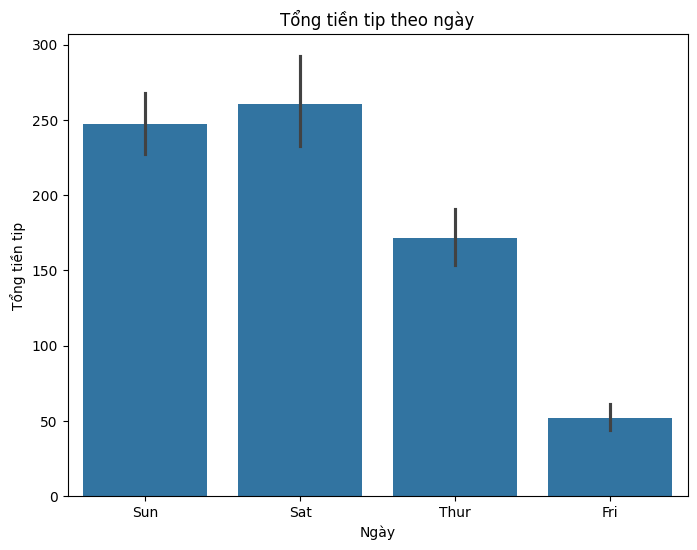

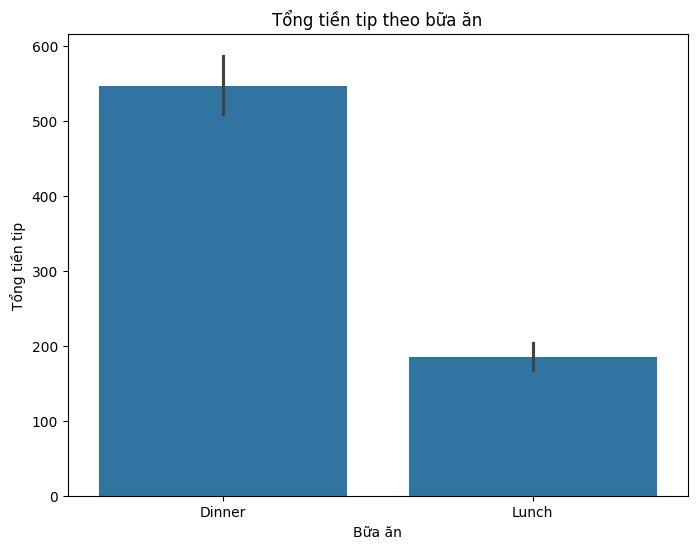

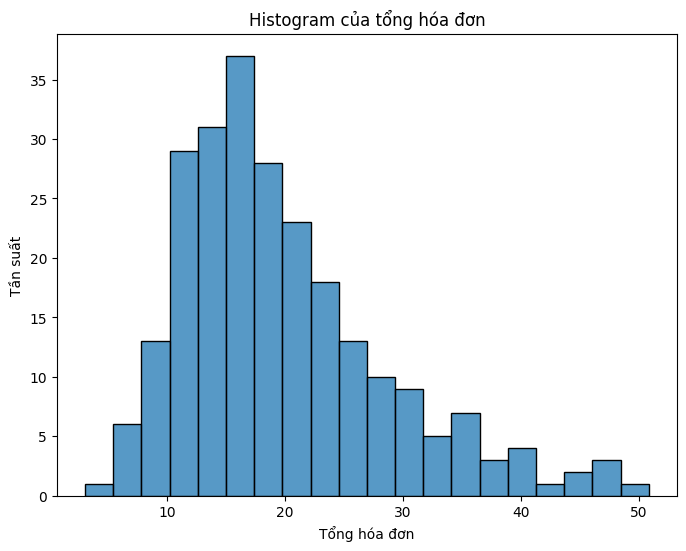

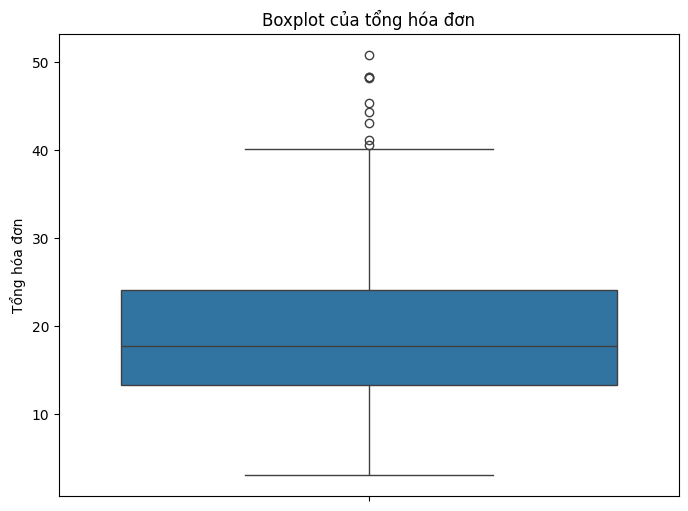

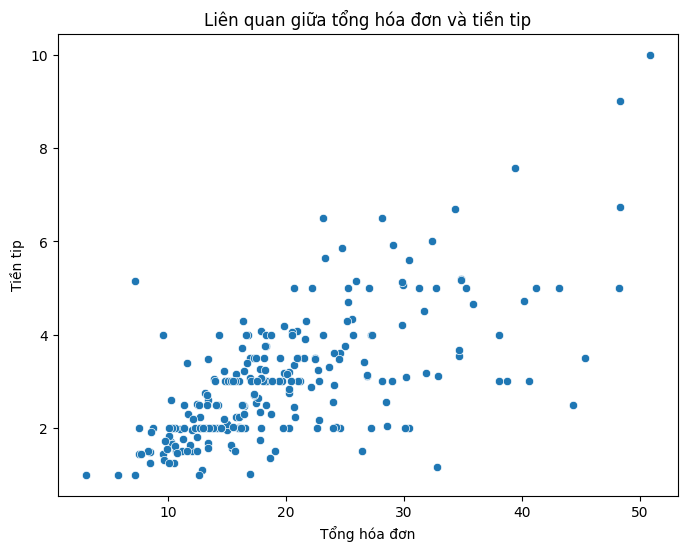

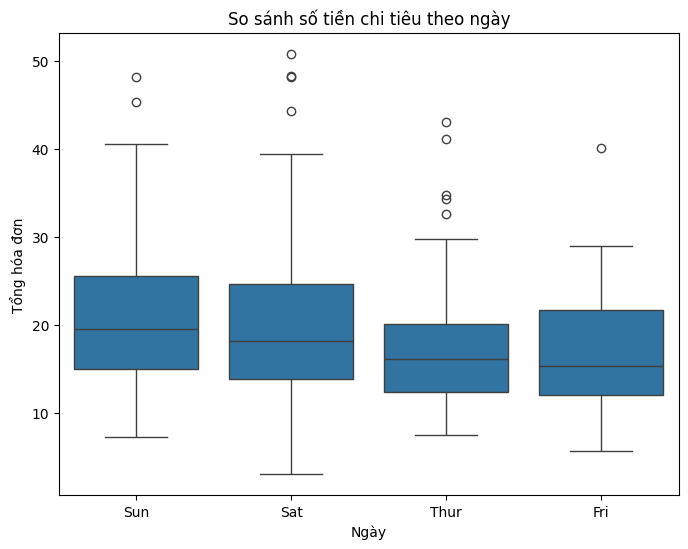

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

# Đọc dữ liệu
path = "/content/drive/MyDrive/data/tips.csv"
df = pd.read_csv(path)
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# 1. Tổng tiền tip theo ngày
plt.figure(figsize=(8, 6))
sns.barplot(x='day', y='tip', data=df, estimator=sum)
plt.title('Tổng tiền tip theo ngày')
plt.xlabel('Ngày')
plt.ylabel('Tổng tiền tip')
plt.show()

# 2. Tổng tiền tip theo bữa ăn (time)
plt.figure(figsize=(8, 6))
sns.barplot(x='time', y='tip', data=df, estimator=sum)
plt.title('Tổng tiền tip theo bữa ăn')
plt.xlabel('Bữa ăn')
plt.ylabel('Tổng tiền tip')
plt.show()

# 3. Histogram của tổng hóa đơn
plt.figure(figsize=(8, 6))
sns.histplot(df['total_bill'], bins=20)
plt.title('Histogram của tổng hóa đơn')
plt.xlabel('Tổng hóa đơn')
plt.ylabel('Tần suất')
plt.show()

# 4. Boxplot của tổng hóa đơn
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['total_bill'])
plt.title('Boxplot của tổng hóa đơn')
plt.ylabel('Tổng hóa đơn')
plt.show()

# 5. Liên quan giữa tổng hóa đơn và tiền tip
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Liên quan giữa tổng hóa đơn và tiền tip')
plt.xlabel('Tổng hóa đơn')
plt.ylabel('Tiền tip')
plt.show()

# 6. So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần
plt.figure(figsize=(8, 6))
sns.boxplot(x='day', y='total_bill', data=df)
plt.title('So sánh số tiền chi tiêu theo ngày')
plt.xlabel('Ngày')
plt.ylabel('Tổng hóa đơn')
plt.show()

## Với Matplotlib

Bạn hãy trực quan với thư viện matplotlib

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


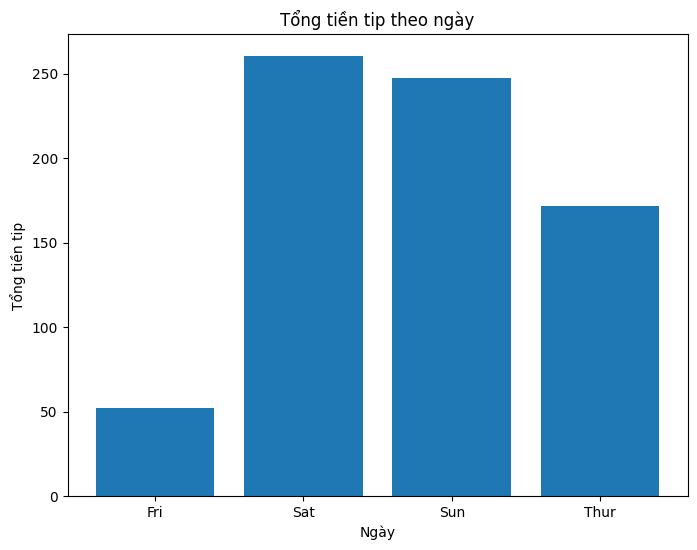

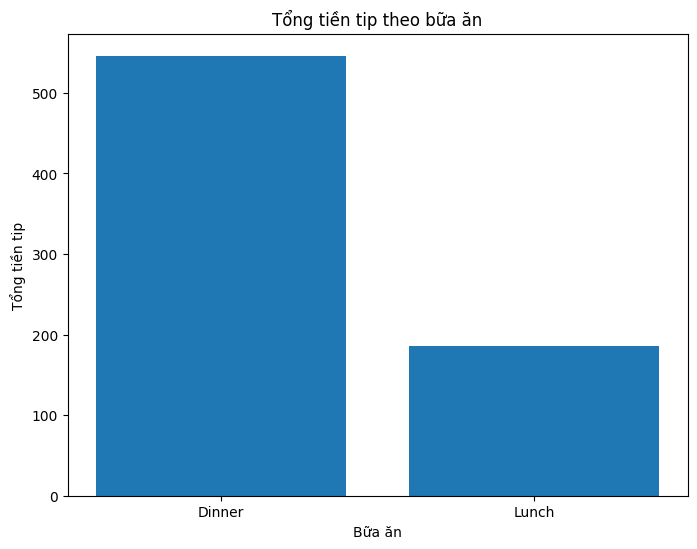

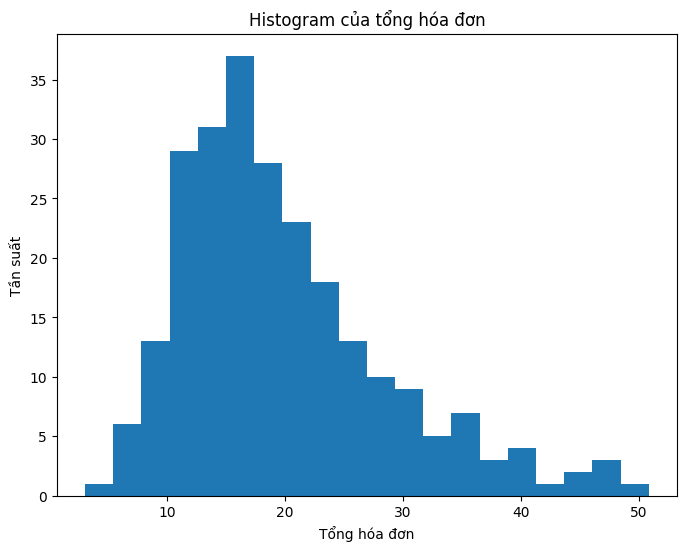

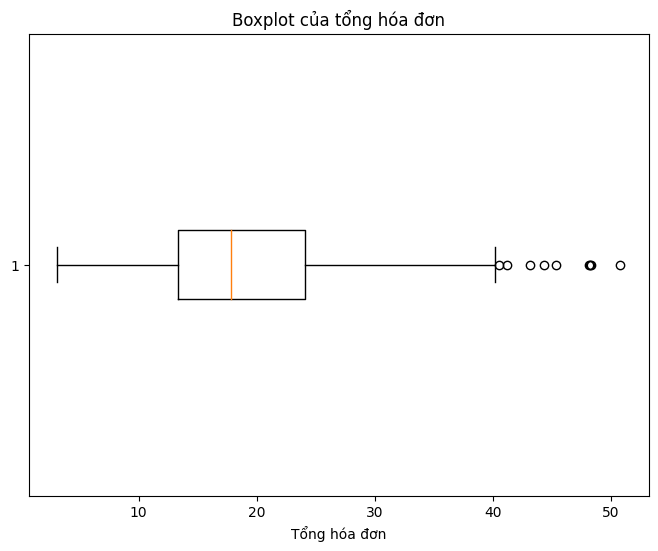

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

# Đọc dữ liệu
path = "/content/drive/MyDrive/data/tips.csv"
df = pd.read_csv(path)
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# 1. Tổng tiền tip theo ngày
tip_by_day = df.groupby('day')['tip'].sum()
plt.figure(figsize=(8, 6))
plt.bar(tip_by_day.index, tip_by_day.values)
plt.title('Tổng tiền tip theo ngày')
plt.xlabel('Ngày')
plt.ylabel('Tổng tiền tip')
plt.show()

# 2. Tổng tiền tip theo bữa ăn (time)
tip_by_time = df.groupby('time')['tip'].sum()
plt.figure(figsize=(8, 6))
plt.bar(tip_by_time.index, tip_by_time.values)
plt.title('Tổng tiền tip theo bữa ăn')
plt.xlabel('Bữa ăn')
plt.ylabel('Tổng tiền tip')
plt.show()

# 3. Histogram của tổng hóa đơn
plt.figure(figsize=(8, 6))
plt.hist(df['total_bill'], bins=20)
plt.title('Histogram của tổng hóa đơn')
plt.xlabel('Tổng hóa đơn')
plt.ylabel('Tần suất')
plt.show()

# 4. Boxplot của tổng hóa đơn
plt.figure(figsize=(8, 6))
plt.boxplot(df['total_bill'], vert=False)  # vert=False để vẽ boxplot nằm ngang
plt.title('Boxplot của tổng hóa đơn')
plt.xlabel('Tổng hóa đơn')
plt.show()

# 5. Liên quan giữa tổng hóa

## Với Seaborn

Bạn hãy tìm hiểu và trực quan với thư viện seaborn

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


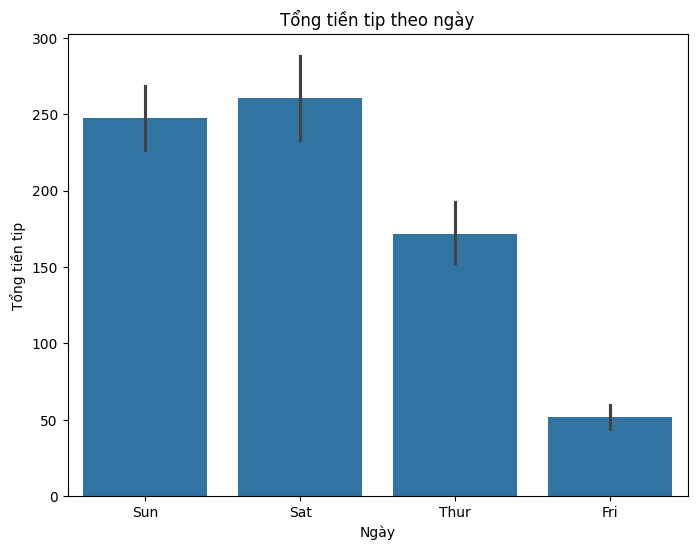

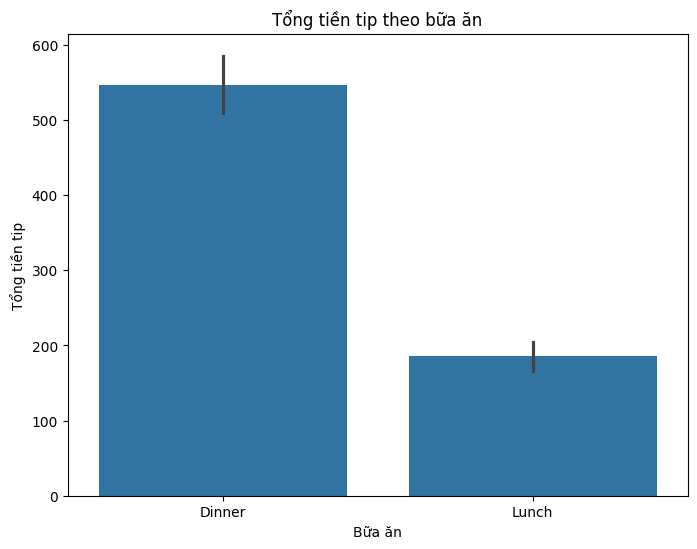

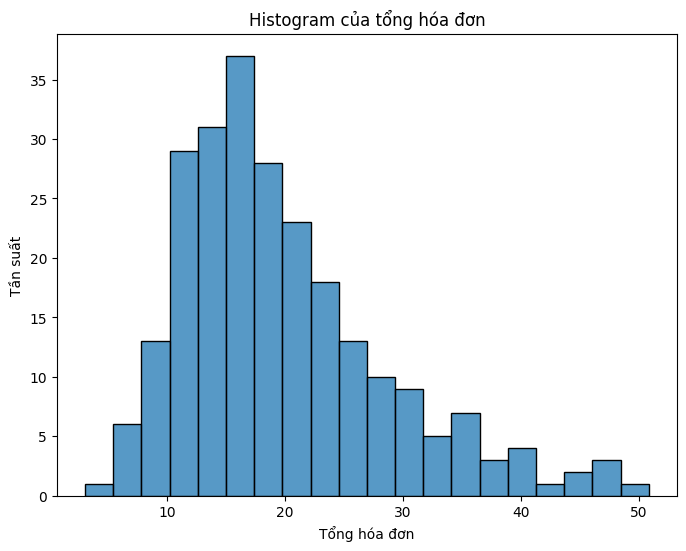

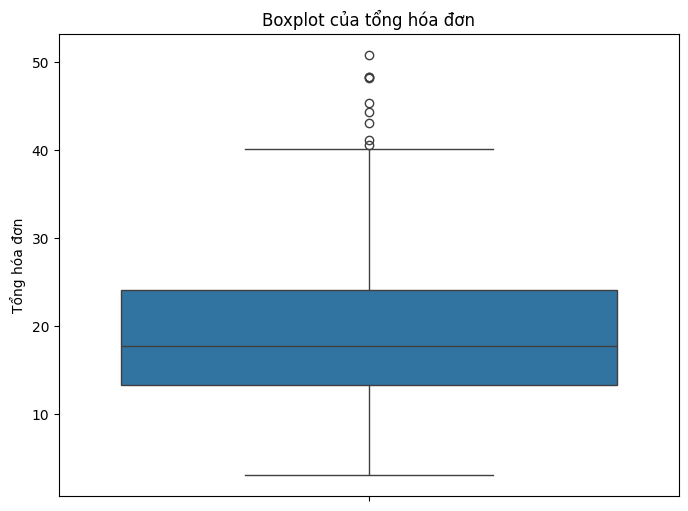

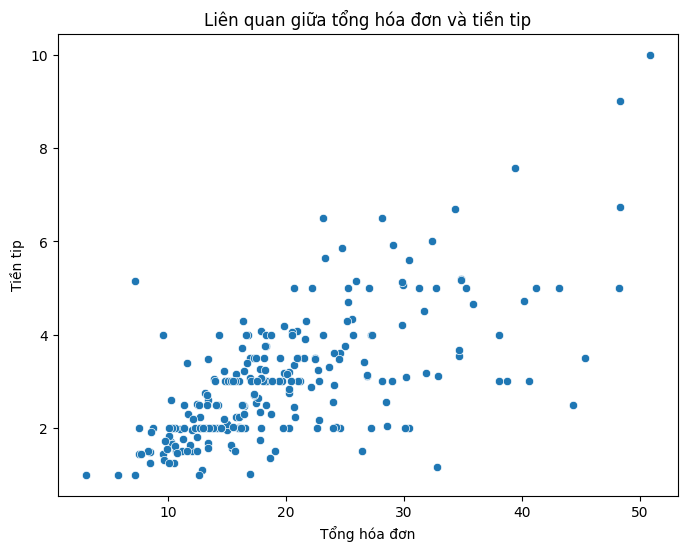

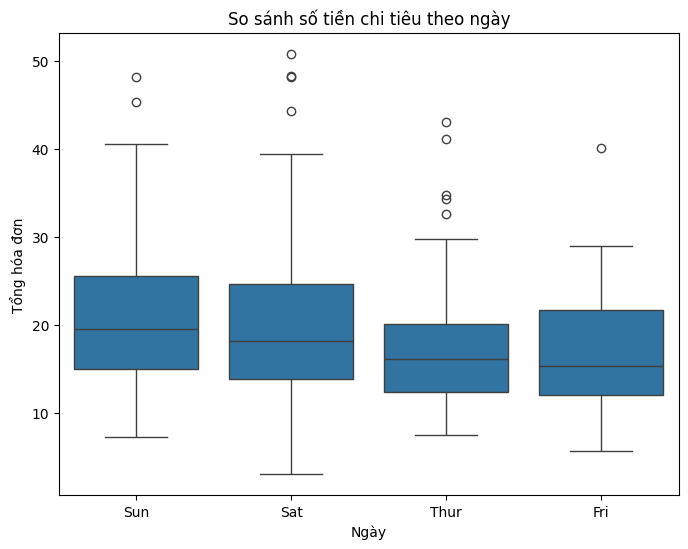

In [22]:
!pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

# Đọc dữ liệu
path = "/content/drive/MyDrive/data/tips.csv"
df = pd.read_csv(path)
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# 1. Tổng tiền tip theo ngày
plt.figure(figsize=(8, 6))
sns.barplot(x='day', y='tip', data=df, estimator=sum)
plt.title('Tổng tiền tip theo ngày')
plt.xlabel('Ngày')
plt.ylabel('Tổng tiền tip')
plt.show()

# 2. Tổng tiền tip theo bữa ăn (time)
plt.figure(figsize=(8, 6))
sns.barplot(x='time', y='tip', data=df, estimator=sum)
plt.title('Tổng tiền tip theo bữa ăn')
plt.xlabel('Bữa ăn')
plt.ylabel('Tổng tiền tip')
plt.show()

# 3. Histogram của tổng hóa đơn
plt.figure(figsize=(8, 6))
sns.histplot(df['total_bill'], bins=20)
plt.title('Histogram của tổng hóa đơn')
plt.xlabel('Tổng hóa đơn')
plt.ylabel('Tần suất')
plt.show()

# 4. Boxplot của tổng hóa đơn
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['total_bill'])  # Hoặc sns.boxplot(x='total_bill', orient='v')
plt.title('Boxplot của tổng hóa đơn')
plt.ylabel('Tổng hóa đơn')
plt.show()

# 5. Liên quan giữa tổng hóa đơn và tiền tip
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Liên quan giữa tổng hóa đơn và tiền tip')
plt.xlabel('Tổng hóa đơn')
plt.ylabel('Tiền tip')
plt.show()

# 6. So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần
plt.figure(figsize=(8, 6))
sns.boxplot(x='day', y='total_bill', data=df)
plt.title('So sánh số tiền chi tiêu theo ngày')
plt.xlabel('Ngày')
plt.ylabel('Tổng hóa đơn')
plt.show()